![](http://pytorch.org/tutorials/_static/pytorch-logo-dark.svg)<br>
http://pytorch.org/tutorials/beginner/deep_learning_60min_blitz.html

In [1]:
from __future__ import print_function
import torch

import numpy as np
import matplotlib.pyplot as plt
from keras.utils import to_categorical

% matplotlib inline
plt.rcParams['figure.figsize'] = (10.0, 10.0) # set default size of plots
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'

Using TensorFlow backend.


# Creating the spiral

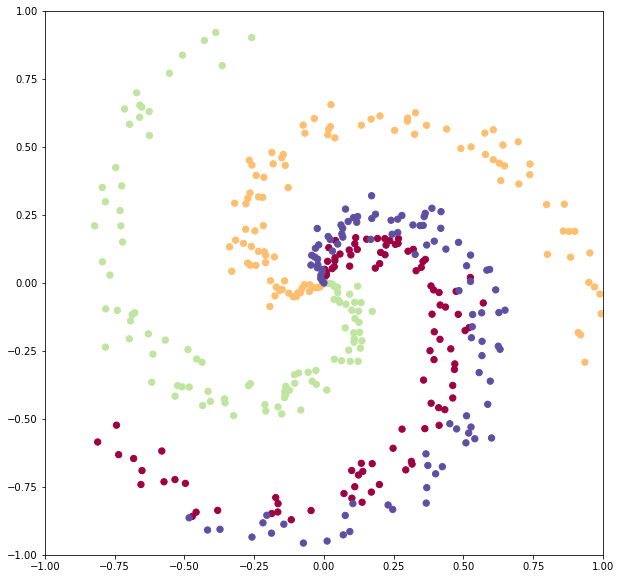

In [2]:
N = 100 # number of points per class
D = 2 # dimensionality
K = 4# number of classes
X = np.zeros((N*K,D)) # data matrix (each row = single example)
y = np.zeros(N*K, dtype='uint8') # class labels
for j in range(K):
    ix = range(N*j,N*(j+1))
    r = np.linspace(0.0,1,N) # radius
    t = np.linspace(j*4,(j+1)*4,N) + np.random.randn(N)*0.2 # theta
    X[ix] = np.c_[r*np.sin(t), r*np.cos(t)]
    y[ix] = j
    
# lets visualize the data:
plt.figure()
plt.axis([-1,1,-1,1])
plt.scatter(X[:, 0], X[:, 1], c=y, s=40, cmap=plt.cm.Spectral)
plt.show()

In [16]:
def plot_boundaries_model(model,type_model = "keras"):
    h = 0.02
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    xy = np.c_[xx.ravel(), yy.ravel()]
    
    if type_model == "keras":
        Z = model.predict(xy)
    elif type_model == "scikit":
        Z = model.predict_proba(xy)
    elif type_model == "pytorch":
        xy = Variable(torch.from_numpy(xy).float())
        Z = model(xy).data.numpy()
        
    Z = np.argmax(Z, axis=1)
    Z = Z.reshape(xx.shape)
    fig = plt.figure()
    plt.contourf(xx, yy, Z, cmap=plt.cm.Spectral, alpha=0.8)
    plt.scatter(X[:, 0], X[:, 1], c=y, s=40, cmap=plt.cm.Spectral)
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    plt.show()

# Define the Neural Network

##### Defining the network

In [4]:
import torch.nn as nn
from torch.autograd import Variable

In [5]:
class Net(nn.Module):
    def __init__(self, input_size, hidden_size, num_classes):
        super(Net, self).__init__()
        self.fc1 = nn.Linear(input_size, hidden_size) 
        self.relu = nn.ReLU()
        self.fc2 = nn.Linear(hidden_size, num_classes)  
        self.softmax = nn.Softmax()
    
    def forward(self, x):
        out = self.fc1(x)
        out = self.relu(out)
        out = self.fc2(out)
        out = self.softmax(out)
        return out

In [6]:
network = Net(2,32,4)

In [7]:
network

Net (
  (fc1): Linear (2 -> 32)
  (relu): ReLU ()
  (fc2): Linear (32 -> 4)
  (softmax): Softmax ()
)

##### Testing a prediction

In [8]:
x_test = torch.from_numpy(np.array([[1,1],[2,2]]))
x_test = x_test.float()
x_test = Variable(x_test,requires_grad = True)

In [9]:
x_test

Variable containing:
 1  1
 2  2
[torch.FloatTensor of size 2x2]

In [10]:
y_test = network(x_test)
y_test

Variable containing:
 0.2038  0.2234  0.2852  0.2876
 0.1513  0.2341  0.2889  0.3256
[torch.FloatTensor of size 2x4]

# Training the neural network

##### Cast the input and output to torch tensors

In [21]:
X_torch = torch.from_numpy(X)
X_torch = X_torch.float()
X_torch = Variable(X_torch,requires_grad = True)

In [22]:
y_torch = torch.from_numpy(y) #to_categorical(y,4))
y_torch = y_torch.long()
y_torch = Variable(y_torch,requires_grad = False)

##### Define the network, loss criterion and optimizer

In [49]:
network = Net(2,32,4)
criterion = nn.CrossEntropyLoss()  
optimizer = torch.optim.Adam(network.parameters(), lr=0.1)  

##### Training phase

In [50]:
n_epochs = 500
for epoch in range(n_epochs):

    # Forward + Backward + Optimize
    optimizer.zero_grad()  # zero the gradient buffer
    outputs = network(X_torch)
    loss = criterion(outputs, y_torch)
    loss.backward()
    optimizer.step()
    
    if (epoch + 1) % 50 == 0:
        print('Epoch [%d/%d], Loss: %.4f' %(epoch+1, n_epochs, loss.data[0]))

Epoch [50/500], Loss: 0.9021
Epoch [100/500], Loss: 0.8304
Epoch [150/500], Loss: 0.8151
Epoch [200/500], Loss: 0.8056
Epoch [250/500], Loss: 0.8008
Epoch [300/500], Loss: 0.7986
Epoch [350/500], Loss: 0.7959
Epoch [400/500], Loss: 0.7949
Epoch [450/500], Loss: 0.7927
Epoch [500/500], Loss: 0.7910


##### Visualize boundaries

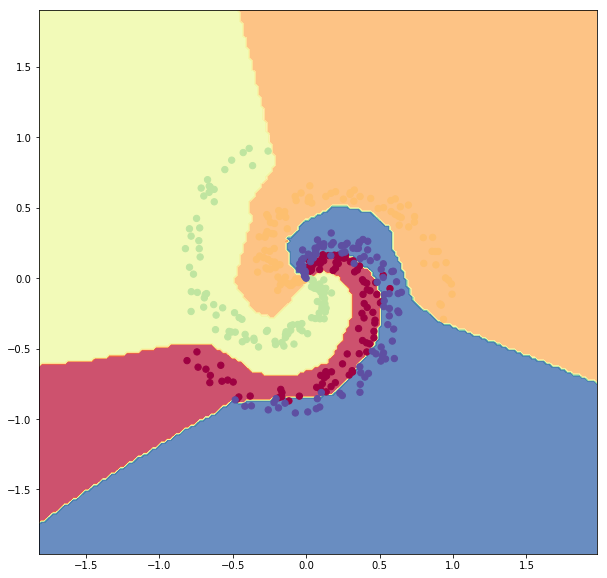

In [51]:
plot_boundaries_model(network,type_model="pytorch")